In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
fin_nifty_index = pd.read_csv(r"E:\2cents_\Dataset_Provided\NewFolder\Indexspotprices\zip\idx_1m\NIFTY FIN SERVICE_NSE_minute.csv")

In [4]:
fin_nifty_index['date_only'] = pd.to_datetime(fin_nifty_index['date'])

# Extract the date part and store it in a new column 'date_only' in y-m-d format
fin_nifty_index['date_only'] = fin_nifty_index['date_only'].dt.strftime('%Y-%m-%d')

In [5]:
fin_nifty_index

,date,open,high,low,close,volume,date_only
0,2015-01-09 09:15:00+05:30,7473.50,7473.65,7466.35,7466.35,0,2015-01-09
1,2015-01-09 09:16:00+05:30,7467.60,7468.70,7460.70,7463.20,0,2015-01-09
2,2015-01-09 09:17:00+05:30,7463.20,7476.70,7463.20,7476.70,0,2015-01-09
3,2015-01-09 09:18:00+05:30,7476.70,7485.55,7476.70,7485.45,0,2015-01-09
4,2015-01-09 09:19:00+05:30,7485.45,7488.70,7483.75,7484.95,0,2015-01-09
...,...,...,...,...,...,...,...
878156,2024-07-11 15:25:00+05:30,23624.95,23631.35,23622.15,23631.35,0,2024-07-11
878157,2024-07-11 15:26:00+05:30,23630.80,23630.80,23624.40,23629.00,0,2024-07-11
878158,2024-07-11 15:27:00+05:30,23629.30,23631.35,23622.45,23624.15,0,2024-07-11
878159,2024-07-11 15:28:00+05:30,23625.20,23626.15,23615.75,23620.30,0,2024-07-11


In [38]:
filtered_data = fin_nifty_index[fin_nifty_index['date'].str.contains('15:29:00\+05:30')]


<>:1: SyntaxWarning: invalid escape sequence '\+'
<>:1: SyntaxWarning: invalid escape sequence '\+'
C:\Users\risha\AppData\Local\Temp\ipykernel_13216\2129247902.py:1: SyntaxWarning: invalid escape sequence '\+'
  filtered_data = fin_nifty_index[fin_nifty_index['date'].str.contains('15:29:00\+05:30')]


In [39]:
filtered_data.reset_index(inplace= True)

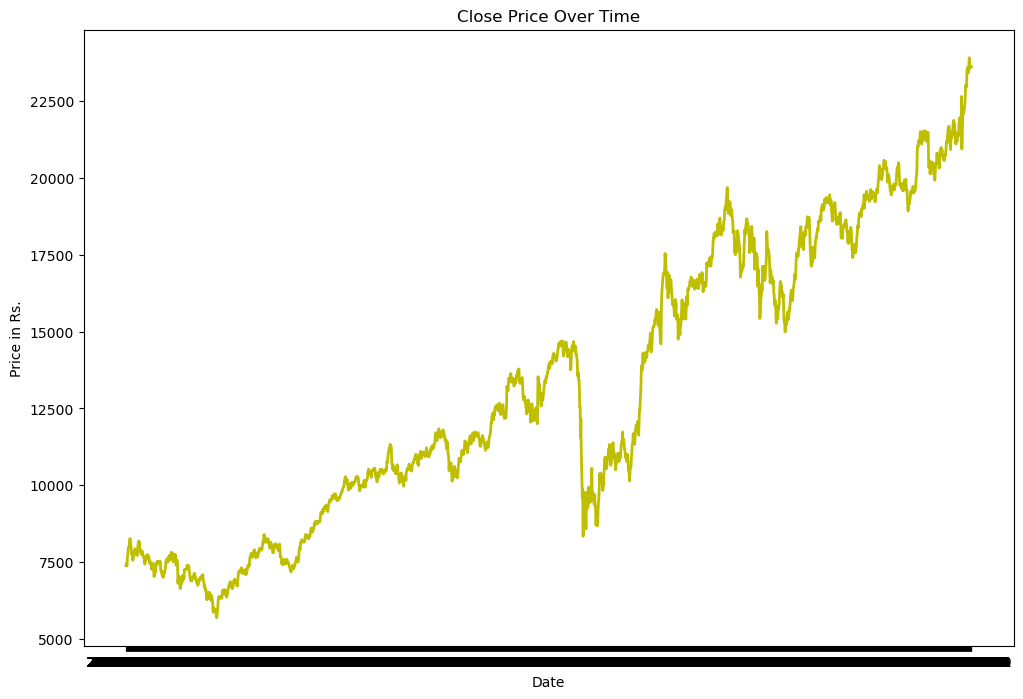

In [40]:
# Plot 'close' against 'date_only'
plt.figure(figsize=(12, 8))
plt.plot(filtered_data['date_only'], filtered_data['close'], color='y', lw=2)
plt.xlabel('Date')
plt.ylabel('Price in Rs.')
plt.title('Close Price Over Time')
plt.show()

In [41]:
short_MA = 10
long_MA = 50

# Create a table 'signals' with the `signal` column
signals = pd.DataFrame(index=filtered_data.index)
signals['signal'] = 0.0

# Compute short simple moving average 
signals['short_mavg'] = filtered_data['close'].rolling(window=short_MA, min_periods=1, center=False).mean()

# Compute long simple moving average 
signals['long_mavg'] = filtered_data['close'].rolling(window=long_MA, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_MA:] = np.where(signals['short_mavg'][short_MA:] 
                                            < signals['long_mavg'][short_MA:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
# print(signals.tail(10))

C:\Users\risha\AppData\Local\Temp\ipykernel_13216\2098878060.py:15: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  signals['signal'][short_MA:] = np.where(signals['short_mavg'][short_MA:]


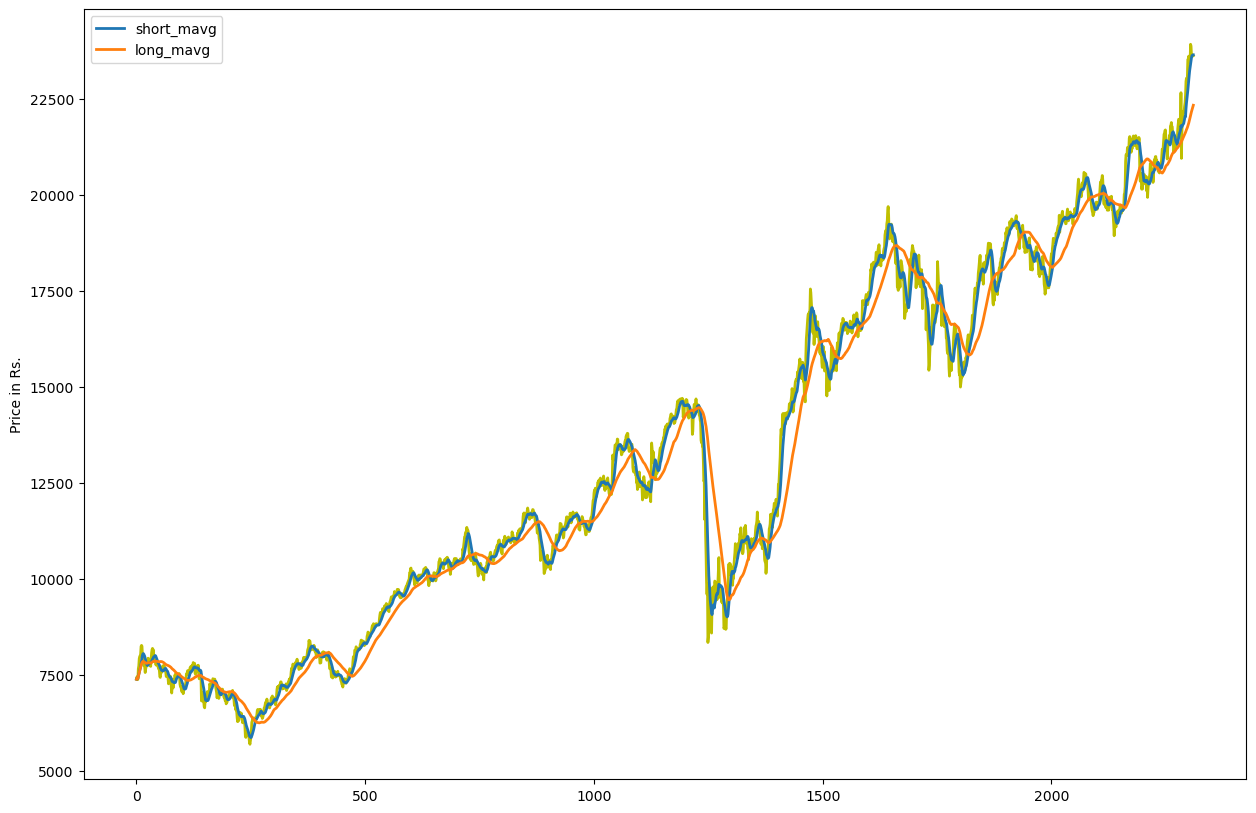

In [42]:
# Initialize the plot figure
fig = plt.figure(figsize = (15,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in Rs.')

# Plot the closing price
filtered_data['close'].plot(ax=ax1, color='y', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
         
# Show the plot
plt.show()

In [43]:
# Concatenate vertically
combined_data = pd.concat([filtered_data, signals], axis=1)

# Reset the index if needed
combined_data.reset_index(drop=True, inplace=True)

In [44]:
filtered_positions = combined_data[combined_data['positions'] == 1]

In [45]:
filtered_positions

,index,date,open,high,low,close,volume,date_only,signal,short_mavg,long_mavg,positions
22,8613,2015-02-12 15:29:00+05:30,7781.45,7792.65,7780.50,7792.65,0,2015-02-12,1.0,7769.925,7796.758696,1.0
47,17948,2015-03-20 15:29:00+05:30,7718.45,7718.45,7712.45,7716.70,0,2015-03-20,1.0,7814.345,7840.848958,1.0
143,58443,2015-08-25 15:29:00+05:30,6955.70,6961.35,6955.70,6959.75,0,2015-08-25,1.0,7421.650,7453.678000,1.0
177,77618,2015-11-13 15:29:00+05:30,6945.30,6945.30,6942.05,6943.95,0,2015-11-13,1.0,7198.255,7204.745000,1.0
402,161975,2016-10-14 15:29:00+05:30,7806.05,7809.70,7803.20,7803.20,0,2016-10-14,1.0,7991.385,8003.468000,1.0
641,251621,2017-09-29 15:29:00+05:30,9924.30,9926.10,9917.15,9917.15,0,2017-09-29,1.0,10061.765,10065.838000,1.0
735,286931,2018-02-16 15:29:00+05:30,10468.45,10477.55,10464.80,10476.80,0,2018-02-16,1.0,10590.330,10623.058000,1.0
878,340556,2018-09-14 15:29:00+05:30,11410.75,11415.35,11406.20,11413.00,0,2018-09-14,1.0,11445.620,11479.590000,1.0
972,375866,2019-02-04 15:29:00+05:30,11482.95,11486.65,11479.05,11484.15,0,2019-02-04,1.0,11446.295,11464.217000,1.0
1086,418613,2019-07-23 15:29:00+05:30,12805.05,12806.40,12800.45,12803.75,0,2019-07-23,1.0,13279.215,13322.403000,1.0


In [46]:
df = pd.read_csv("E:/2cents_/merged_finnifty.csv")

C:\Users\risha\AppData\Local\Temp\ipykernel_13216\3091726382.py:1: DtypeWarning: Columns (4,5,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("E:/2cents_/merged_finnifty.csv")


In [47]:
dates_to_keep = filtered_positions['date_only']

In [48]:
filtered_df = df[df['date'].isin(dates_to_keep)]


In [49]:
filtered_df = filtered_df[filtered_df['instrument_type'] == 'PE']

In [50]:
filtered_df['strike_check'] = filtered_df.apply(lambda row: 'low' if row['strike_price'] < row['spot_price'] else 'high', axis=1)


In [83]:
import seaborn as sns

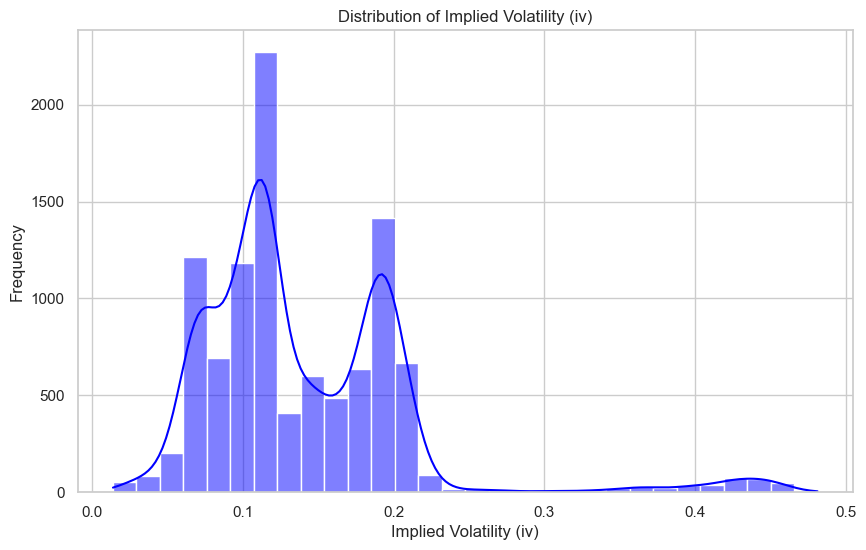

In [84]:
filtered_df# Set the style for the plot
sns.set(style='whitegrid')

# Create a figure and axis
plt.figure(figsize=(10, 6))

# Plot the distribution of 'iv' using a histogram with KDE
sns.histplot(filtered_df['iv'], bins=30, kde=True, color='blue')

# Add labels and title
plt.title('Distribution of Implied Volatility (iv)')
plt.xlabel('Implied Volatility (iv)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [86]:
filt

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,strike_price,instrument_type,expiry_date,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho,strike_check
1760612,FINNIFTY06FEB2420300PE,2024-01-24 10:33:59,2024-01-24,10:33:59,306.75,306.75,306.75,306.75,40,0,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20317.70,0.217971,-0.483175,0.000477,15.283519,-12.799029,-3.611971,low
1760613,FINNIFTY06FEB2420300PE,2024-01-24 10:33:59,2024-01-24,10:33:59,306.75,306.75,306.75,306.75,40,0,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20317.70,0.217971,-0.483175,0.000477,15.283519,-12.799029,-3.611971,low
1760614,FINNIFTY06FEB2420300PE,2024-01-24 10:37:59,2024-01-24,10:37:59,306.75,306.75,304.15,304.15,40,40,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20314.80,0.215377,-0.484568,0.000483,15.283499,-12.646516,-3.620643,low
1760615,FINNIFTY06FEB2420300PE,2024-01-24 10:37:59,2024-01-24,10:37:59,306.75,306.75,304.15,304.15,40,40,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20314.80,0.215377,-0.484568,0.000483,15.283499,-12.646516,-3.620643,low
1760622,FINNIFTY06FEB2420300PE,2024-01-24 10:53:59,2024-01-24,10:53:59,304.25,314.65,304.25,313.4,600,1560,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20256.85,0.203154,-0.514305,0.000513,15.241506,-11.894410,-3.828844,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443078,FINNIFTY30JAN2420250PE,2024-01-24 09:55:59,2024-01-24,09:55:59,218.95,223.85,209.35,210.45,7400,45360,20250.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20228.60,0.201069,-0.511092,0.000765,10.342778,-17.315594,-1.735497,high
11443079,FINNIFTY30JAN2420250PE,2024-01-24 09:55:59,2024-01-24,09:55:59,218.95,223.85,209.35,210.45,7400,45360,20250.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20228.60,0.201069,-0.511092,0.000765,10.342778,-17.315594,-1.735497,high
11449404,FINNIFTY30JAN2420300PE,2024-01-24 09:45:59,2024-01-24,09:45:59,276.05,276.05,255.40,259.25,10680,365960,20300.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20199.30,0.207310,-0.568870,0.000732,10.177455,-17.566263,-1.933066,high
11449405,FINNIFTY30JAN2420300PE,2024-01-24 09:45:59,2024-01-24,09:45:59,276.05,276.05,255.40,259.25,10680,365960,20300.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20199.30,0.207310,-0.568870,0.000732,10.177455,-17.566263,-1.933066,high


In [97]:
filt = filtered_df[(filtered_df['iv'] > 0.2)]

In [98]:
# Calculate the bounds for the strike price based on the spot price
filt['lower_bound'] = filt['spot_price'] * 0.995  # 5% lower
filt['upper_bound'] = filt['spot_price'] * 1.005  # 5% higher

# filter to keep only those options whose strike prices are within the bounds
filt = filt[
    (filt['strike_price'] >= filt['lower_bound']) &
    (filt['strike_price'] <= filt['upper_bound'])
]

# Optionally, drop the bounds columns if you don't need them anymore
filt.drop(columns=['lower_bound', 'upper_bound'], inplace=True)


C:\Users\risha\AppData\Local\Temp\ipykernel_13216\3735220477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['lower_bound'] = filt['spot_price'] * 0.995  # 5% lower
C:\Users\risha\AppData\Local\Temp\ipykernel_13216\3735220477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt['upper_bound'] = filt['spot_price'] * 1.005  # 5% higher


In [99]:
filt

,ticker,datetime,date,time,open,high,low,close,volume,open_interest,strike_price,instrument_type,expiry_date,instrument_name,expiry_type,Time_to_expiry,spot_price,iv,delta,gamma,vega,theta,rho,strike_check
1760612,FINNIFTY06FEB2420300PE,2024-01-24 10:33:59,2024-01-24,10:33:59,306.75,306.75,306.75,306.75,40,0,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20317.70,0.217971,-0.483175,0.000477,15.283519,-12.799029,-3.611971,low
1760613,FINNIFTY06FEB2420300PE,2024-01-24 10:33:59,2024-01-24,10:33:59,306.75,306.75,306.75,306.75,40,0,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20317.70,0.217971,-0.483175,0.000477,15.283519,-12.799029,-3.611971,low
1760614,FINNIFTY06FEB2420300PE,2024-01-24 10:37:59,2024-01-24,10:37:59,306.75,306.75,304.15,304.15,40,40,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20314.80,0.215377,-0.484568,0.000483,15.283499,-12.646516,-3.620643,low
1760615,FINNIFTY06FEB2420300PE,2024-01-24 10:37:59,2024-01-24,10:37:59,306.75,306.75,304.15,304.15,40,40,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20314.80,0.215377,-0.484568,0.000483,15.283499,-12.646516,-3.620643,low
1760622,FINNIFTY06FEB2420300PE,2024-01-24 10:53:59,2024-01-24,10:53:59,304.25,314.65,304.25,313.4,600,1560,20300.0,PE,2024-02-06 15:30:00,FINNIFTY,NaN,13.0,20256.85,0.203154,-0.514305,0.000513,15.241506,-11.894410,-3.828844,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443078,FINNIFTY30JAN2420250PE,2024-01-24 09:55:59,2024-01-24,09:55:59,218.95,223.85,209.35,210.45,7400,45360,20250.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20228.60,0.201069,-0.511092,0.000765,10.342778,-17.315594,-1.735497,high
11443079,FINNIFTY30JAN2420250PE,2024-01-24 09:55:59,2024-01-24,09:55:59,218.95,223.85,209.35,210.45,7400,45360,20250.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20228.60,0.201069,-0.511092,0.000765,10.342778,-17.315594,-1.735497,high
11449404,FINNIFTY30JAN2420300PE,2024-01-24 09:45:59,2024-01-24,09:45:59,276.05,276.05,255.40,259.25,10680,365960,20300.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20199.30,0.207310,-0.568870,0.000732,10.177455,-17.566263,-1.933066,high
11449405,FINNIFTY30JAN2420300PE,2024-01-24 09:45:59,2024-01-24,09:45:59,276.05,276.05,255.40,259.25,10680,365960,20300.0,PE,2024-01-30 15:30:00,FINNIFTY,NaN,6.0,20199.30,0.207310,-0.568870,0.000732,10.177455,-17.566263,-1.933066,high


In [103]:
import pandas as pd
from tqdm import tqdm

# Separate the DataFrame into high and low options
high_options = filt[filt['strike_check'] == 'high']
low_options = filt[filt['strike_check'] == 'low']

# Initialize a list to store paired options
paired_options = []

# Set a threshold for how close the differences need to be
threshold = 10  # Adjust this threshold as needed

# Use tqdm to create a progress bar for the high options iteration
for index, high_row in tqdm(high_options.iterrows(), total=high_options.shape[0], desc="Pairing Options"):
    # Calculate the difference from spot price
    high_diff = abs(high_row['strike_price'] - high_row['spot_price'])
    
    # Find low options with a similar difference and check for matching date and days to expiry
    potential_matches = low_options[
        (low_options['date'] == high_row['date']) &  # Check for the same date
        (low_options['Time_to_expiry'] == high_row['Time_to_expiry'])  # Check for the same days to expiry
    ]
    
    for _, low_row in potential_matches.iterrows():
        low_diff = abs(low_row['strike_price'] - low_row['spot_price'])
        
        # Check if the differences are approximately equal
        if abs(high_diff - low_diff) <= threshold:
            paired_options.append({
                'high_strike_price': high_row['strike_price'],
                'high_spot_price': high_row['spot_price'],
                'high_open': high_row['open'],  # Open value of high option
                'high_diff': high_diff,
                'high_ticker': high_row['ticker'],  # Ticker of high option
                'low_strike_price': low_row['strike_price'],
                'low_spot_price': low_row['spot_price'],
                'low_open': low_row['open'],  # Open value of low option
                'low_diff': low_diff,
                'low_ticker': low_row['ticker'],  # Ticker of low option
                'date': high_row['date'],  # Common date
                'Time_to_expiry': high_row['Time_to_expiry']  # Common time to expiry
            })

# Convert the paired options list to a DataFrame for easier analysis
paired_df = pd.DataFrame(paired_options)

# Display the paired options DataFrame
print(paired_df)


Pairing Options:   0%|          | 0/517 [00:00<?, ?it/s]

Pairing Options: 100%|██████████| 517/517 [00:05<00:00, 98.48it/s] 

       high_strike_price  high_spot_price  high_open  high_diff  \
0                17000.0          16996.3      71.75        3.7   
1                17000.0          16996.3      71.75        3.7   
2                17000.0          16996.3      71.75        3.7   
3                17000.0          16996.3      71.75        3.7   
4                17000.0          16996.3      71.75        3.7   
...                  ...              ...        ...        ...   
31687            20300.0          20199.3     276.05      100.7   
31688            20300.0          20199.3     276.05      100.7   
31689            20300.0          20199.3     276.05      100.7   
31690            20300.0          20199.3     276.05      100.7   
31691            20300.0          20199.3     276.05      100.7   

                  high_ticker  low_strike_price  low_spot_price  low_open  \
0        FINNIFTY2221517000PE           17000.0        17009.00     65.00   
1        FINNIFTY2221517000PE           1

In [104]:
paired_df

,high_strike_price,high_spot_price,high_open,high_diff,high_ticker,low_strike_price,low_spot_price,low_open,low_diff,low_ticker,date,Time_to_expiry
0,17000.0,16996.3,71.75,3.7,FINNIFTY2221517000PE,17000.0,17009.00,65.00,9.00,FINNIFTY2221517000PE,2022-02-15,0.0
1,17000.0,16996.3,71.75,3.7,FINNIFTY2221517000PE,17000.0,17010.20,70.00,10.20,FINNIFTY2221517000PE,2022-02-15,0.0
2,17000.0,16996.3,71.75,3.7,FINNIFTY2221517000PE,17000.0,17012.20,74.90,12.20,FINNIFTY2221517000PE,2022-02-15,0.0
3,17000.0,16996.3,71.75,3.7,FINNIFTY2221517000PE,17000.0,17003.00,71.00,3.00,FINNIFTY2221517000PE,2022-02-15,0.0
4,17000.0,16996.3,71.75,3.7,FINNIFTY2221517000PE,17000.0,17006.45,69.90,6.45,FINNIFTY2221517000PE,2022-02-15,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
31687,20300.0,20199.3,276.05,100.7,FINNIFTY30JAN2420300PE,20050.0,20142.85,153.95,92.85,FINNIFTY30JAN2420050PE,2024-01-24,6.0
31688,20300.0,20199.3,276.05,100.7,FINNIFTY30JAN2420300PE,20100.0,20199.30,175.50,99.30,FINNIFTY30JAN2420100PE,2024-01-24,6.0
31689,20300.0,20199.3,276.05,100.7,FINNIFTY30JAN2420300PE,20100.0,20199.30,175.50,99.30,FINNIFTY30JAN2420100PE,2024-01-24,6.0
31690,20300.0,20199.3,276.05,100.7,FINNIFTY30JAN2420300PE,20150.0,20241.50,161.80,91.50,FINNIFTY30JAN2420150PE,2024-01-24,6.0


In [105]:
final = pd.merge(paired_df, filtered_data, left_on = 'date', right_on = 'date_only', how = 'inner')

In [106]:
# Calculate the payoff for each option pair
final['payoff'] = (
    final['low_open'] - final['high_open'] +
    final[['close', 'low_strike_price', 'high_strike_price']].apply(
        lambda row: - max(row['low_strike_price'] - row['close'], 0) + max(row['high_strike_price'] - row['close'], 0), axis=1
    )
)

# Display the final DataF

In [107]:
# Sort the final DataFrame by 'payoff' in descending order and get the top 5 entries
top_5_payoffs = final.sort_values(by='payoff', ascending=False).head(5)

# Display the top 5 payoffs
top_5_payoffs[['date_x', 'payoff', 'high_open', 'low_open', 'close', 'high_strike_price', 'low_strike_price']]


,date_x,payoff,high_open,low_open,close,high_strike_price,low_strike_price
8526,2021-03-24,254.65,140.0,123.40,15628.75,15900.0,15600.0
8528,2021-03-24,251.90,140.0,120.65,15628.75,15900.0,15600.0
8527,2021-03-24,251.25,140.0,120.00,15628.75,15900.0,15600.0
8523,2021-03-24,251.25,140.0,120.00,15628.75,15900.0,15600.0
8522,2021-03-24,249.85,140.0,118.60,15628.75,15900.0,15600.0
